In [2]:
import numpy as np 
import pandas as pd 
import offset_analysis as a

In [3]:
n_samples = 50
input_dir = "C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/110124_50_500k@200k/"

offsets_y = np.loadtxt(input_dir + "offsets_y.csv", delimiter = ",")
offsets_z = np.loadtxt(input_dir + "offsets_z.csv", delimiter = ",")

In [3]:
a.Analyse_Run(input_dir, 2, offsets_y=offsets_y[2], offsets_z=offsets_z[2])

OFFSET RECONSTRUCTION SUMMARY FOR TRACKING PLANE 1

Y AXIS
PREDICTED OFFSET: 0.0
TRUE OFFSET: 0.0
RESIDUAL: 0.0
PERCENTAGE DIFFERENCE: nan

Z AXIS
PREDICTED OFFSET: 0.0
TRUE OFFSET: 0.0
RESIDUAL: 0.0
PERCENTAGE DIFFERENCE: nan


OFFSET RECONSTRUCTION SUMMARY FOR TRACKING PLANE 2

Y AXIS
PREDICTED OFFSET: 0.05323074641413792
TRUE OFFSET: 0.05423835492099918
RESIDUAL: -0.0010076085068612614
PERCENTAGE DIFFERENCE: -1.8577416448726964

Z AXIS
PREDICTED OFFSET: -0.03681237619974274
TRUE OFFSET: -0.03409871828928278
RESIDUAL: 0.0027136579104599587
PERCENTAGE DIFFERENCE: 7.9582402113714075


OFFSET RECONSTRUCTION SUMMARY FOR TRACKING PLANE 3

Y AXIS
PREDICTED OFFSET: 0.08771940422692537
TRUE OFFSET: 0.09211285598111399
RESIDUAL: -0.004393451754188621
PERCENTAGE DIFFERENCE: -4.769640141316882

Z AXIS
PREDICTED OFFSET: 0.03780559399790418
TRUE OFFSET: 0.04120965174364045
RESIDUAL: -0.0034040577457362664
PERCENTAGE DIFFERENCE: -8.260340967966533


OFFSET RECONSTRUCTION SUMMARY FOR TRACKING PLANE

(array([0.        , 0.05323075, 0.0877194 , 0.03305526, 0.09376806,
        0.12531147]),
 array([ 0.        , -0.03681238,  0.03780559, -0.00264921, -0.00299842,
        -0.0030205 ]))

In [4]:
pred_offsets_y, pred_offsets_z = a.Analyse_Multiple_Runs(input_dir, n_samples, offsets_y, offsets_z)


ANALYSING DATAFRAME: 0

OFFSET RECONSTRUCTION SUMMARY FOR TRACKING PLANE 1

Y AXIS
PREDICTED OFFSET: 0.0
TRUE OFFSET: 0.0
RESIDUAL: 0.0
PERCENTAGE DIFFERENCE: nan

Z AXIS
PREDICTED OFFSET: 0.0
TRUE OFFSET: 0.0
RESIDUAL: 0.0
PERCENTAGE DIFFERENCE: nan


OFFSET RECONSTRUCTION SUMMARY FOR TRACKING PLANE 2

Y AXIS
PREDICTED OFFSET: -0.036407039422269895
TRUE OFFSET: -0.03624735326563222
RESIDUAL: 0.00015968615663767421
PERCENTAGE DIFFERENCE: 0.4405457012749121

Z AXIS
PREDICTED OFFSET: 0.06676532411683575
TRUE OFFSET: 0.07047574724113798
RESIDUAL: -0.0037104231243022257
PERCENTAGE DIFFERENCE: -5.264822679505246


OFFSET RECONSTRUCTION SUMMARY FOR TRACKING PLANE 3

Y AXIS
PREDICTED OFFSET: 0.03798955856386758
TRUE OFFSET: 0.041124666777898757
RESIDUAL: -0.0031351082140311792
PERCENTAGE DIFFERENCE: -7.623425208434882

Z AXIS
PREDICTED OFFSET: 0.02902731444691218
TRUE OFFSET: 0.03285187571776432
RESIDUAL: -0.0038245612708521434
PERCENTAGE DIFFERENCE: -11.641835320788244


OFFSET RECONSTRUCTI

In [5]:
print("Y SUM OF FAKES: " + str(np.sum(pred_offsets_y[offsets_y.flatten() == 0])))
print("Z SUM OF FAKES: " + str(np.sum(pred_offsets_z[offsets_z.flatten() == 0])))

Y SUM OF FAKES: 4.428535214679755
Z SUM OF FAKES: -0.40125101056319046


In [38]:
offsets_y_flat = offsets_y.flatten()
offsets_z_flat = offsets_z.flatten()
truth = np.append(offsets_y_flat[offsets_y_flat != 0], offsets_z_flat[offsets_z_flat != 0])
pred = np.append(pred_offsets_y[offsets_y_flat != 0], pred_offsets_z[offsets_z_flat != 0])

res = pred-truth
rel_err = (((pred - truth)/truth)*100)

print("Mean Relative Error: " + str(np.mean(rel_err)))
print("Median Relative Error: " + str(np.median(rel_err)))
print("Standard Deviation Relative Error: " + str(np.std(rel_err)))
print("\n")
print("Mean Residual (um): " + str(np.mean(np.abs(res))*1000))
print("Median Residual (um): " + str(np.median(np.abs(res))*1000))
print("Standard Deviation Residual (um): " + str(np.std(res)*1000))

Mean Relative Error: 31.698870093229807
Median Relative Error: -0.6997546432130152
Standard Deviation Relative Error: 450.16288253274945


Mean Residual (um): 2.4579643571450203
Median Residual (um): 2.8905763728211955
Standard Deviation Residual (um): 1.350568243264694


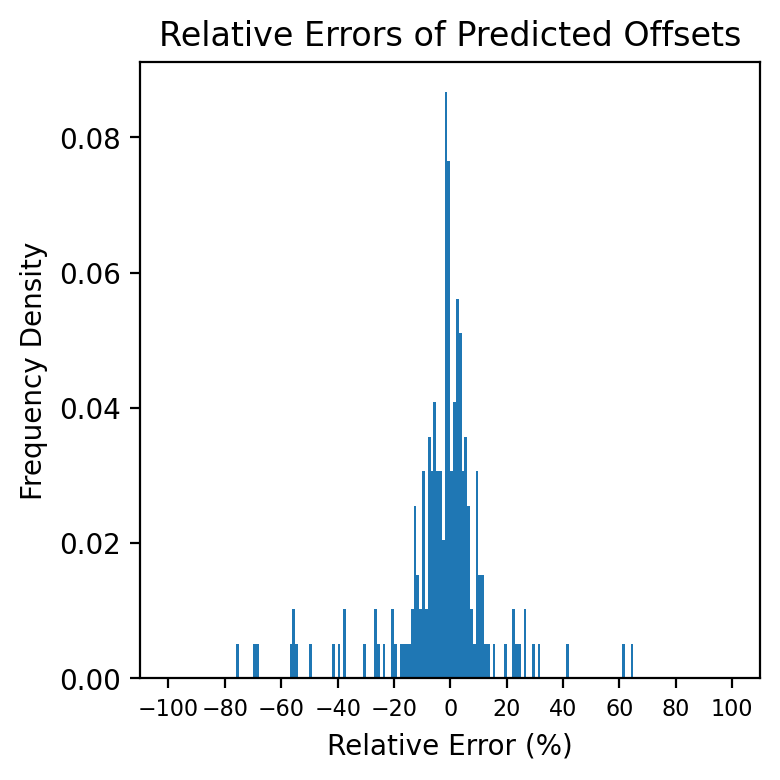

In [34]:
from matplotlib import pyplot as plt

plt.figure(figsize = (4,4), dpi = 200)
plt.hist(rel_err, bins = np.arange(-100, 101, 1), density = True)
plt.xlabel("Relative Error (%)")
plt.ylabel("Frequency Density")
plt.title("Relative Errors of Predicted Offsets")
plt.xticks(np.arange(-100,120,20), size = 8)
plt.show()

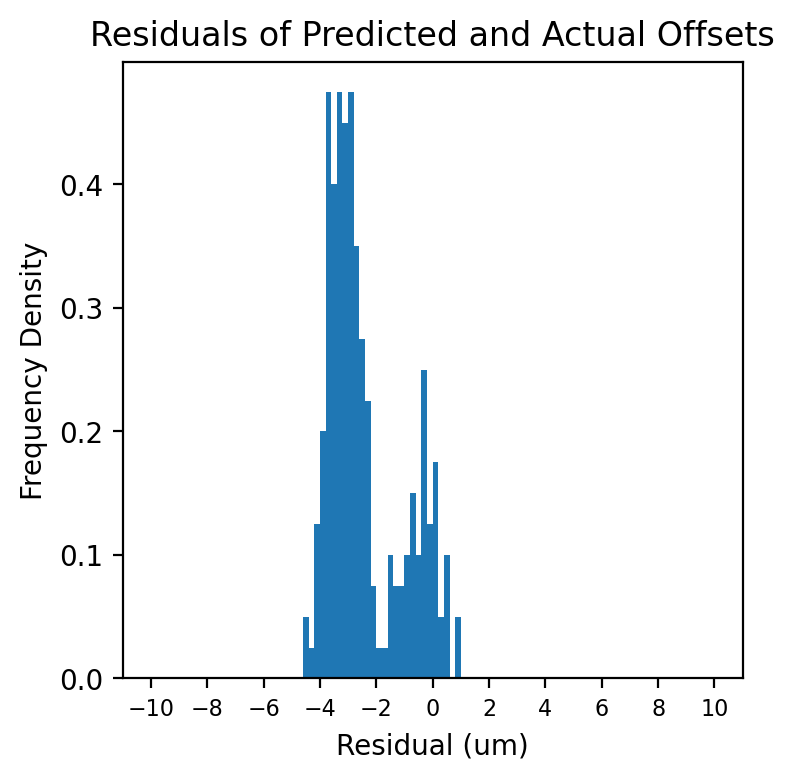

In [33]:
from matplotlib import pyplot as plt

plt.figure(figsize = (4,4), dpi = 200)
plt.hist(res*1000, bins = np.arange(-10, 10.2, 0.2), density = True)
plt.xlabel("Residual (um)")
plt.ylabel("Frequency Density")
plt.title("Residuals of Predicted and Actual Offsets")
plt.xticks(np.arange(-10,12,2), size = 8)
plt.show()